<a href="https://colab.research.google.com/github/XavierCarrera/tensorflow-image-classifier/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Drees", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
train_images.shape

(60000, 28, 28)

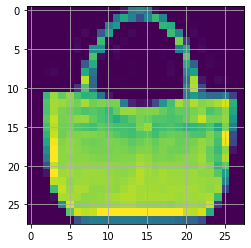

In [9]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

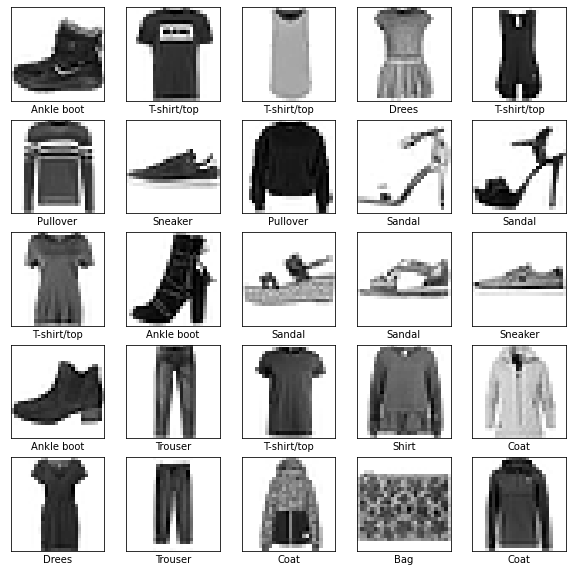

In [12]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid("off")
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [13]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), keras.layers.Dense(128, activation = tf.nn.relu), keras.layers.Dense(10, activation = tf.nn.softmax)])

In [17]:
model.compile(optimizer = tf.optimizers.Adam(), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [18]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4958 - accuracy: 0.8255
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3732 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3341 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3138 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2934 - accuracy: 0.8920


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy ", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8755
Accuracy  0.8755000233650208


In [20]:
predictions = model.predict(test_images)

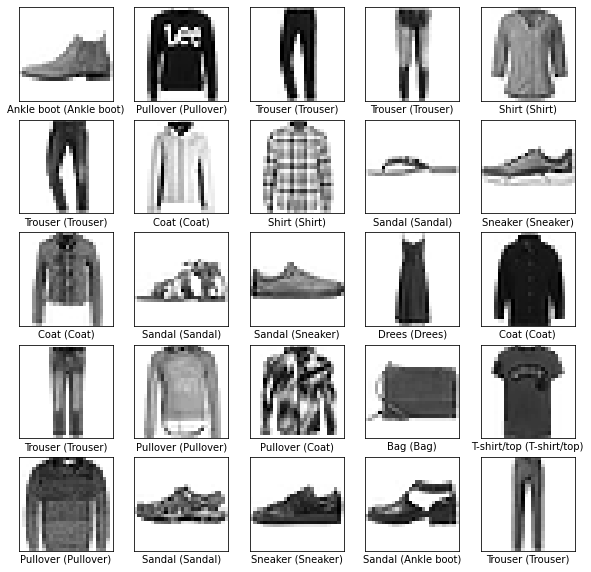

In [22]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid("off")
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"

  plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label], color = color)) 